<a href="https://www.kaggle.com/code/motahareshokri/regression-analysis-with-boston-housing-dataset?scriptVersionId=145102247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-size:60px; color:White; background:#F7A100">Regression Analysis </h1>
<br>

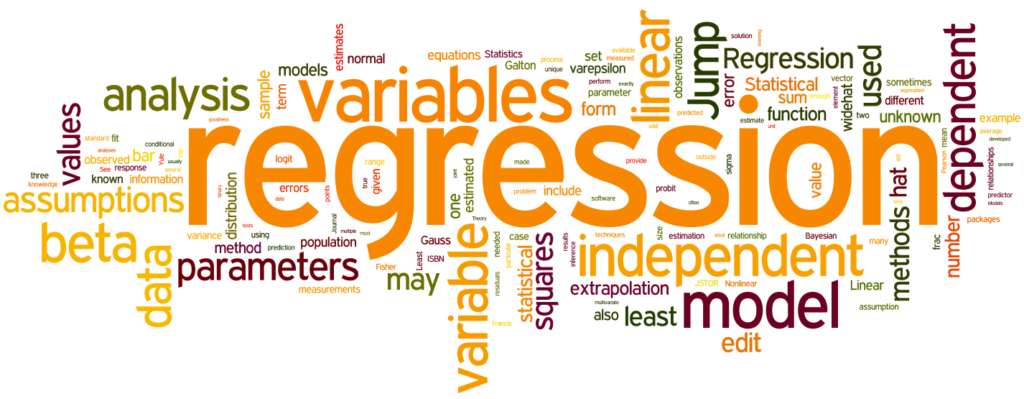

<p style=" font-size:40px;  color:Black;">Motahare Shokri</p>

<p style=" font-size:30px; color:Black;">ِData Scientist</p> 

 <p style=" font-size:20px; color:Black;">ِ Last release:  8/27/2023 </p>

[linkedin](https://www.linkedin.com/in/motahare-shokri/)
[github](https://github.com/motishokri)

# Introdoction

**This is a project to improve skills in the field of regression models. The purpose of the project is as follows:**
- **<span style="color:Purple"> Intuitive </span> data analysis**  
-  **Data <span style="color:Purple"> preprocessing </span>**
- **Learning the concepts of <span style="color:Purple"> test and training data  </span>**
- **Using the <span style="color:Purple"> correlation</span> criterion to detect the relationship between variables**
- **Learning the concepts of <span style="color:Purple"> simple linear regression </span> , <span style="color:Purple"> multivariate regression </span>and <span style="color:Purple">Forward and Backward Stepwise Regression**</span>
- **Learning the concepts of <span style="color:Purple"> collinearity, correlation between errors, non-constant variance of errors, high leverage point </span>**
- **Improve <span style="color:Purple"> coding </span>  skills**

## Data description

**The `Boston` housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts. It has `506` samples and `14` variables. The response data is `medv` which is the median-value of owner-occupied homes in $1000. You can download it [here](http://lib.stat.cmu.edu/datasets/boston).**

> |Variable| Description| 
 |:-------------|:-------------|
 |CRIM    | <b> Per capita crime rate by town |
 |ZN      | <b>Proportion of residential land zoned for lots over 25,000 sq.ft.|
 |INDUS   | <b> Proportion of non-retail business acres per town|
 |CHAS    | <b>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
 |NOX     | <b>Nitric oxides concentration (parts per 10 million)|
 |RM      | <b>Average number of rooms per dwelling|
 |AGE     | <b>Proportion of owner-occupied units built prior to 1940|
 |DIS     | <b>Weighted distances to five Boston employment centres|
 |RAD     | <b>Index of accessibility to radial highways|
 |TAX     | <b>Full-value property-tax rate per 10,000 Dollar|
 |PTRATIO | <b>Pupil-teacher ratio by town|
 |BLACK   | <b>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
 |LSTAT   | <b>Lower status of the population|
 |MEDV    | <b>Median value of owner-occupied homes in 1000's Dollar|

# Step 1: Preprocessing

- **<span style="color:Purple"> Reading </span>  data using the `pandas` package**
- **Checking the presence of <span style="color:Purple"> outlier data </span> using boxplot and interquartile range**
- **Checking the existence of  <span style="color:Purple"> missing value </span> using the `info` method** 
- **Investigating the necessity of  <span style="color:Purple"> data scaling </span>**
- **<span style="color:Purple"> Data plot </span> and initial review and conclusion of the data trend (mental visualization)**
- **Draw the <span style="color:Purple"> scatterplot matrix </span>**
- **Checking the absence of <span style="color:Purple"> correlation </span> between predictors**

## Read data

In [ ]:
#Required modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn

#Data scaling
from sklearn.preprocessing import MinMaxScaler

#train and test 
from sklearn.model_selection import train_test_split

# Building a linear regression model
from sklearn.linear_model import LinearRegression

#MSE
from sklearn.metrics import mean_squared_error

#statsmodels
import statsmodels.api as sm

#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Forward and Backward Stepwise Regression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#Goldfeld-Quandt test
import statsmodels.api as sm
from statsmodels.compat import lzip

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Read data
Boston = pd.read_csv("/kaggle/input/boston/Boston.csv")


In [ ]:
Boston.head()

In [ ]:
Boston.info()

In [ ]:
#change type of Chas variable
Boston["chas"] = Boston["chas"].astype('category')

In [ ]:
Boston.info()

## Definition IQR function 

In [ ]:
#function for calculate the IQR criterion
def iqr_func(data):
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    return iqr

In [ ]:
#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    for i in data :
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)    
    return outlier

## Remove outliers

In [ ]:
column_names = list(Boston.columns)
Boston_out   = pd.DataFrame()
for name in column_names:
    Boston_out[name] = outlier_func(Boston[name])    

In [ ]:
Boston_out.drop('chas', inplace=True, axis=1)

In [ ]:
Boston_out.head(3)

In [ ]:
Boston_colsum = Boston_out.sum()
Boston_colsum

In [ ]:
Boston_rowsum = Boston_out.sum(axis = 1)
Boston_rowsum 

In [ ]:
list(Boston_rowsum[Boston_rowsum  == 4].index)

In [ ]:
n_otlier_feature = 3
for j in range(len(Boston)):
    if Boston_rowsum[j] >= n_otlier_feature:
        Boston = Boston.drop(j)

In [ ]:
Boston.info()

In [ ]:
Boston.head(3)

## Data scaling

In [ ]:
mms = MinMaxScaler() 

In [ ]:
Boston.info()

In [ ]:
Boston_scaling = mms.fit_transform(Boston.loc[:, Boston.columns != "chas"]) 

In [ ]:
Boston_scaling = pd.DataFrame(Boston_scaling)

In [ ]:
Boston_scaling.info()

In [ ]:
Boston_scaling.columns = ['crim', 'zn','indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
                           'ptratio','black','lstat', 'medv']

In [ ]:
Boston_scaling.head(3)

## Box Plot

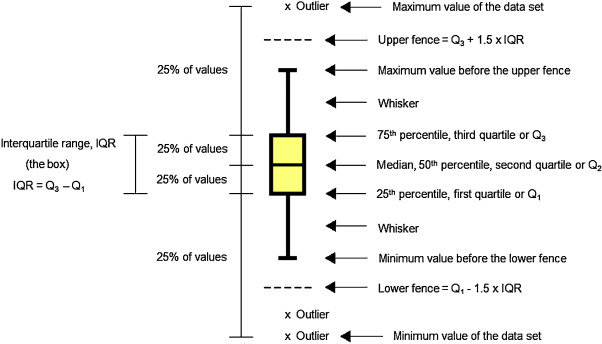

In [ ]:
fig = plt.figure(figsize =(10, 7))
boxplot = Boston_scaling.boxplot(column = list(Boston_scaling.columns))  

## ScatterPlot

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2, hspace=.3, wspace=.3)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='none', sharey='none')
fig.suptitle('ScatterPlot Matrix')
ax1.scatter(Boston_scaling["crim"], Boston_scaling["medv"], c ="blue")
ax1.set(xlabel='crim', ylabel='medv')
ax2.scatter(Boston_scaling["lstat"], Boston_scaling["medv"], c ="red")
ax2.set(xlabel='lstat', ylabel='medv')
ax3.scatter(Boston_scaling["nox"], Boston_scaling["medv"], c ="green")
ax3.set(xlabel='nox', ylabel='medv')
ax4.scatter(Boston_scaling["indus"], Boston_scaling["medv"], c ="orange")
ax4.set(xlabel='indus', ylabel='medv')

## Corrlation

In [ ]:
corrMatrix = Boston_scaling.corr()
print (corrMatrix)

In [ ]:
fig = plt.figure(figsize =(14, 10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Step 2: linear regression 

## Simple linear regression

**Linear regression is one of the most commonly used machine learning algorithms for solving regression problems. It is a statistical method that is used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting line that represents the relationship between the variables.**

$$ medv_i = \beta_0 + \beta_1 lstat_i + \epsilon_i$$

**USE-CASES:** 
1. **House-price estimations using various variables like the area of the property, location, number of bedrooms, etc.** 
2. **Stock price prediction models**

In [ ]:
Data_step2 = Boston_scaling.loc[:, ["medv", "lstat"]]

In [ ]:
# Dividing the data into training and test sets
data_train, data_test = train_test_split(Data_step2, test_size=0.20, random_state = 42)

In [ ]:
# Building a linear regression model
model = LinearRegression()
x_train = np.array(data_train["lstat"]).reshape((-1, 1))
y_train = np.array(data_train["medv"])
model.fit(x_train,y_train)

### R_Square

In [ ]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

**The result of `R2` indicates that the predictor variable (lstat) was able to explain (determine) nearly 55% of the response or target variable (medv).Actually, our model, based on this prediction, is not considered a good fit since the prediction accuracy falls below 85% to 90%. Therefore, there is a need to strengthen our model.**

**`R2` indicates how effectively a model can predict the value of the response variable in terms of percentage.**

In [ ]:
print(f"intercept: {model.intercept_}")

In [ ]:
print(f"slope: {model.coef_}")

**This coefficient indicates that with each percentage increase in the population within each area, on average, the mean value of expensive homes (in thousands of dollars) decreases by 0.6.**

## MSE

In [ ]:
mean_squared_error(y_train, model.predict(x_train)) #mean_squared_error(Y_true,Y_pred)

**A lower value of MSE is preferred.**

In [ ]:
x_test = np.array(data_test["lstat"]).reshape((-1, 1))
y_test = np.array(data_test["medv"])

mean_squared_error(y_test, model.predict(x_test)) #mean_squared_error(Y_true,Y_pred)

**These results demonstrate that your regression model has, on average, provided more accurate predictions of the actual values. In essence, a smaller difference between the predicted and actual variables, indicating a lower percentage of error, is desirable. This is precisely the outcome we aim to achieve with our model.**


## Draw a regression line

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(Boston_scaling["lstat"], Boston_scaling["medv"], color = 'blue')  
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('lstat')
plt.ylabel('medv')
  
plt.show()

**By employing a plot, it becomes evident that a robust negative linear correlation exists between the two variables. In simpler terms, an increase in the independent or predictive variable (lstat) corresponds to a decrease in the dependent or response variable (medv). It's possible that a quadratic relationship might yield a more accurate representation.**

**As can be observed, the straight-line model fails to encapsulate the inherent data patterns, illustrating an instance of under-fitting.**

##  Evaluation plots

In [ ]:
error = y_train - model.predict(x_train)
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2, hspace=.3, wspace=.3)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='none', sharey='none')
fig.suptitle('Evaluation plots')

ax1.scatter(model.predict(x_train), error , color = 'blue')
ax1.axhline(y = 0, color = 'r', linestyle = '-')
ax1.set(xlabel='fitted value', ylabel='Error')


ax2.scatter(y_train, error, color = 'blue')
ax2.axhline(y = 0, color = 'r', linestyle = '-')
ax2.set(xlabel='Respons', ylabel='Error')

ax3.scatter(x_train, error, color = 'blue')
ax3.axhline(y = 0, color = 'r', linestyle = '-')
ax3.set(xlabel='Pridictor', ylabel='Error')

ax4.scatter(Boston_scaling["lstat"], Boston_scaling["medv"], color = 'green')  
ax4.plot(x_train, model.predict(x_train), color = 'red')
ax4.set(xlabel='Pridictor', ylabel='Respons')
  
plt.show()

**In the residuals plot, our aim is to identify results that lack any specific pattern or trend. The presence of a pattern suggests that the error variable demonstrates a consistent pattern relative to the actual values, indicating a deficiency in the model. Therefore, in the provided plot, we can observe that the residuals exhibit a distinct U-shaped pattern of dispersion, underscoring the model's inadequate performance.**

### Histogram of Residuals

In [ ]:
plt.hist(error, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

**In the histogram above, it's evident that the residuals do not adhere to a normal distribution. The distribution is skewed in a way that more data points are clustered on the left side. This results in a right-skewed pattern, signifying a scarcity of data points on the right side. This observation implies that the model's performance is relatively subpar.**

### Q-Q Plot

In [ ]:
# create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(error, fit=True, line="45", alpha=0.2)
plt.show()

**In a Q-Q Plot, when data points lie along a straight line, it indicates that the residuals are normally distributed. Conversely, if the points deviate from the straight line, it suggests a departure from normal distribution. In such instances, data transformation or considering alternative modeling approaches might become necessary. Looking at the given plot, it's evident that the residuals don't conform to a straight line; instead, they deviate from it. Consequently, the distribution isn't normal, implying a less effective model performance.**

## Polynomial  regression

**In the previous phase, we constructed our linear regression model and discerned its relatively subpar performance. This was evident when examining the disparity between the actual values and the optimal linear fit that our model provided. The actual values seemed to be scattered in a curvilinear manner, while our linear regression line did not closely align with the average points. Essentially, the model's predictive capacity was constrained, yielding an R-squared value of approximately 60%. This is where polynomial regression steps in, aiming to fit a line that adheres to the curved data pattern.**

**An important differentiation between linear and polynomial regression lies in the fact that polynomial regression doesn't require a linear correlation between independent and dependent variables within the dataset. When a linear regression model falls short in accurately capturing existing data points and delivering optimal outcomes, the utilization of polynomial regression becomes pertinent.**

**To address the limitations of the single predictor variable model, we have two strategies at our disposal:**

**1. Incorporate additional predictor variables into the model to bolster its predictive prowess, a technique encompassed by multiple regression.**

**2. Elevate the model's complexity, such as by elevating it to higher degrees like polynomial regression. In essence, we seek to either modify the structure or utilize polynomial regression.**

**Moving forward, we will leverage the polynomial regression model to more precisely investigate relationships between variables, accommodating cases where purely linear correlation might not suffice. Polynomial regression is employed when a linear relationship between variables is absent.**

**Ultimate Objective: Our ultimate objective is to attain results devoid of distinct patterns or trends. The presence of a pattern signifies that the error variable demonstrates a pattern relative to actual values, which serves as an indicator of the model's weakness.**

$$ medv_i = \beta_0 + \beta_1 lstat_i + \beta_2 lstat^2_i + \epsilon_i$$

**Due to the fact that the weights linked to the features remain linear, this model is still recognized as a linear model. lstat2i (the square of lstat) functions as a feature. Nevertheless, the curve we are striving to fit exhibits a quadratic nature.**

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(x_train)

In [ ]:
model2 = LinearRegression().fit(X_poly, y_train)
model2

### R_Square

In [ ]:
r_sq2 = model2.score(X_poly, y_train)
print(f"coefficient of determination: {r_sq2}")

**The R-squared outcome reveals that even following the implemented adjustments, the model has succeeded in predicting nearly 63% of the variance, exhibiting a slight enhancement. Nonetheless, the disparity from linear regression isn't substantial, and essentially, it retains its status as a model of modest efficacy.**

In [ ]:
# GETTING THE INTERCEPT
print(f'Intercept: {model2.intercept_}')

In [ ]:
# GETTING THE COEFFICIENTS
print(f'slop: {model2.coef_}')

### MSE

In [ ]:
mean_squared_error(y_train, model2.predict(X_poly))

## Advanced Linear Regression With Statsmodels

**For a more detailed exploration, we can conduct a thorough analysis of linear regression through the utilization of statistical models. Python's Statsmodels module offers a range of classes and functions designed for estimating diverse statistical models and performing various statistical tests.**

In [ ]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X)
results = model.fit()

In [ ]:
print(results.summary())

**For a more comprehensive understanding, we analyze the results of regression using a table commonly referred to as the "Model Summary." This table provides insights into the features and statistics associated with fitting the regression model. Essentially, it represents the output of a linear regression model computed through the Ordinary Least Squares (OLS) method based on input data. These outcomes encapsulate the summation and evaluation of the model, furnishing crucial information about its performance and the relationships among variables. According to the regression findings:**

**1. `Rsq or R-squared` (coefficient of determination), which essentially equates to the squared correlation coefficient, indicates that values close to one suggest a superior fit and a higher proportion of the dependent variable's variability is explained by the model. The R-squared value is approximately 55%, suggesting that roughly 55% of the variation in the dependent variable (assessment score) can be accounted for by the independent variable x1. This underscores how much the variance in the dependent variable Y, attributable to the independent variable x1, is covered, approximately 55%.**

**2. `Adj Rsq` (adjusted R-squared) rises as independent or predictor variables are introduced to the model, signifying an improved model fit. This approach can be extended by incorporating additional independent variables, bolstering the model's capability to portray the dependent variable. However, this might introduce complexity to the regression model. While the addition of independent variables enhances the adjusted R-squared value, it might result from random or chance fluctuations stemming from sample variations. The adjusted R-squared aims to strike a balance between model complexity and the number of variables while depicting the dependent variable's variability. Consequently, through the adjusted R-squared, a harmony between augmenting variables and adjusting R-squared is achieved. The outcome reveals an adjusted R-squared value of approximately 55%, indicating that about 55% of the variation in the dependent variable is elucidated by the independent variables, demonstrating a substantial correspondence with the R-squared value. This signifies that the model adjustment has been judiciously executed, reflecting the effectiveness of the variables employed in the model and their aptness in providing an appropriate fit.**

**3. `F-statistic`: The computed F-statistic value is 527.7, and the associated probability is significantly less than 0.05. This implies that at least one of the independent variables exerts a noteworthy influence on the dependent variable.**

**4. `P-values` for each coefficient ascertain the statistical significance of the coefficients. In this context, both the const and x1 coefficients exhibit P-values below 0.05, indicating their statistical significance and correlation with the dependent variable.**

**5. Coefficient or `const` coefficient stands at 0.61, while the coefficient for x1 is 0.69 These coefficients depict the degree to which variations in the dependent variable can be attributed to fluctuations in the independent variables. For instance, a negative coefficient for the x1 variable indicates that with an increase in the value of the independent variable, the value of the dependent variable tends to decrease.**

**6. `Standard error of the estimate` or the standard error of the regression coefficients (`std err`) gauges the accuracy of the coefficient estimations. These values are presented for each coefficient, offering an insight into the precision of the coefficient estimates. In essence, these values indicate the accuracy of the coefficient estimations. They provide a measure of error dispersion for each coefficient. This value, in fact, represents the standard error deviation and reflects the root mean square error (or residual error). Furthermore, this value can also be employed to estimate the variance of the dependent variable. In evaluating two models with nearly identical coefficients of determination, the preference lies with the model exhibiting lower standard errors of the residuals.**

**As a conclusion, our model has completed these validation tests but has yet to achieve precise predictions. Our model holds an R-squared value of only 55%, signifying that approximately 45% of unaccounted factors affect the accuracy of the target variable prediction.**

# Step 3: Multiple or Multivariable Regression

## Multiple or Multivariable Regression 

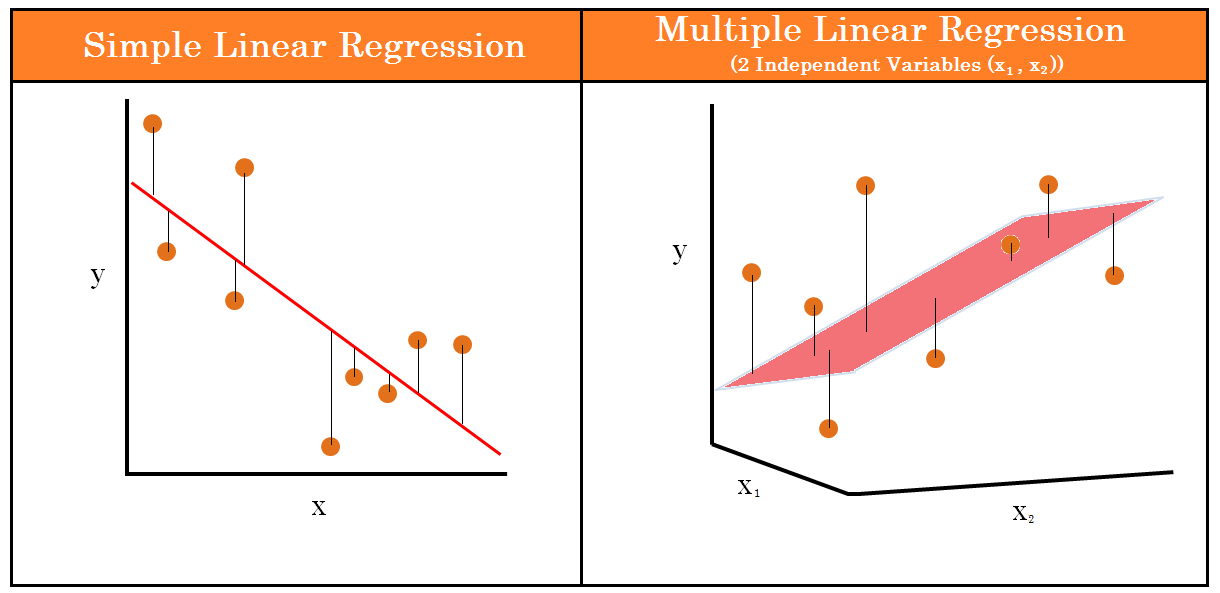

**`multivariate regression` is a technique that estimates a single regression model with more than one outcome variable. When there is more than one predictor variable in a multivariate regression model, the model is a multivariate multiple regression.**

**After obtaining unsatisfactory results from the previous models, it is prudent to explore alternative approaches to enhance the model's performance. To address this, I will employ the Sklearn package to conduct regression once more. This time, I will expand the model by incorporating additional predictor variables, thereby transforming it into a multiple regression model. For our specific project, I will proceed with regression analysis on the `medv` variable (the response variable), considering its relationship with the other variables.**

In [ ]:
data_train, data_test = train_test_split(Boston_scaling, test_size=0.20, random_state = 42)

In [ ]:
#train and test data
X_train = data_train.loc[:, data_train.columns != "medv"]
y_train = data_train["medv"]

In [ ]:
X_test = data_test.loc[:, data_test.columns != "medv"]
y_test = data_test["medv"]

In [ ]:
#Doing regression on the change of medv (response variable) on other variable
# Using Sklearn modules

#fit train data with regression model
model3 = LinearRegression()
model3.fit(X_train,y_train)

### R_Square

In [ ]:
r_sq = model3.score(X_train , y_train)
print(f"coefficient of determination: {r_sq}")

**The R-squared outcome reveals that, following the implemented changes, the multiple regression model has been able to achieve a prediction accuracy of approximately 72%. While this does represent an improvement compared to earlier results, it still falls short of being deemed acceptable.**

## MSE

In [ ]:
mean_squared_error(y_train, model3.predict(X_train))

In [ ]:
mean_squared_error(y_test, model3.predict(X_test))

**a lower value of MSE is desirable, signifying improved performance. The results indicate that it appears to be lower than in the previous stage.**

## Plot y_predicton vs error

In [ ]:
error = y_train - model3.predict(X_train)
plt.figure(figsize=(5, 4))
plt.scatter(model3.predict(X_train), error , color = 'blue')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('fitted value')
plt.ylabel('error')

**Analyzing multiple linear regression necessitates that the residuals, which are the differences between observed and predicted values, conform to a normal distribution. This assumption can be verified by inspecting a histogram or a Q-Q plot of the residuals. If the residuals deviate from a normal distribution, it signifies that the model fails to effectively capture relationships among the features within the dataset. Residual analysis is a valuable technique employed to assess the credibility of a regression model by scrutinizing the disparities between observed and predicted values. This analysis, when conducted alongside regression, holds significance as it furnishes a metric for evaluating the goodness of fit of the model. The goodness of fit quantifies the extent of error associated with predictions, elucidating how adeptly the model forecasts outcomes. It's worth noting that all regression models entail some form of error in their estimations.**

**In the provided plot, our focus is on identifying outcomes that lack any specific or discernible patterns. The presence of patterns within residuals is indicative of the error variable manifesting its own distinct pattern in relation to the actual values, revealing shortcomings in the model. In essence, if residual patterns are present, the model struggles to accurately capture the intricate relationships between variables. This scenario might necessitate model enhancement or the exploration of alternative models. As a result, in the aforementioned chart, we observe that residuals still exhibit a particular pattern, taking on a U-shaped dispersion. This signifies that the model's performance remains relatively suboptimal, though there is a slight improvement compared to its prior state.**

**an illustrative example of an appropriate model exhibiting a random pattern (random distribution) is presented below:**

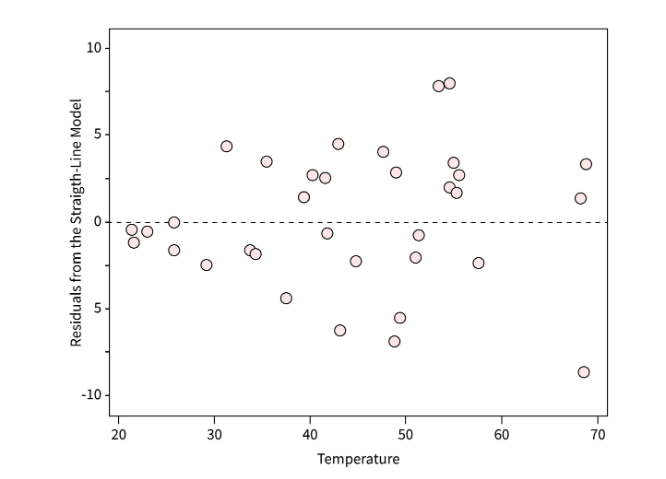

**an illustrative example of an inadequate model exhibiting a U-shaped curved pattern is presented below:**

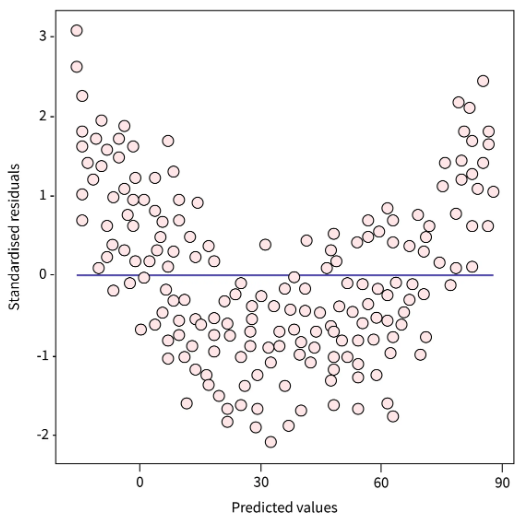

## Histogram plot

In [ ]:
plt.hist(error, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

**In the depicted histogram, the distribution is nearly normal, albeit not entirely so. The graph still shows a slight right skewness; however, it is an enhancement over the linear regression scenario.**

## Statsmodels With Multiple or Multivariable Regression

In [ ]:
X=sm.add_constant(X_train)        #to add constant value in the model
model3= sm.OLS(y_train,X)         #fitting the model
predictions= model3.fit()  

In [ ]:
print(predictions.summary()) 

**I will now delve into the outcomes of the multiple linear regression model utilizing the Ordinary Least Squares (OLS) approach:**

**1.`R-squared`: This metric indicates that approximately 72% of the variance in the dependent variable (medv) is accounted for by the independent variables (crim, zn, indus, nox, rm, age, dis, rad, tax, ptratio, black, lstat) within the regression model. Ranging from 0 to 1, a value closer to 1 signifies a greater capacity of the model to elucidate variations in outcomes.**

**2.`Adjusted R-squared`: Analogous to R-squared, this measure is adjusted based on the number of independent variables and the sample size. In this instance, it stands at 0.71, indicating that it elucidates about 70% of the variability in the dependent variable.**

**3.`F-statistic`: This statistical tool gauges whether at least one independent variable significantly influences the dependent variable. In our scenario, the F-statistic equals 81, and its corresponding p-value (Prob (F-statistic)) is markedly below 0.05, underscoring a notable impact from at least one independent variable.**

**4.`Coefficients`: Within this section, the coefficients pertaining to the independent variables (crim, zn, indus, nox, rm, age, dis, rad, tax, ptratio, black, lstat) are showcased. These coefficients elucidate the alteration in the dependent variable due to a one-unit shift in the respective independent variable. For instance, the coefficient for the variable "crim" rests at -0.25, indicating that a one-unit increase in "crim" corresponds to an approximate reduction of -0.25 units in the dependent variable "medv".**

**5.`t and P>|t| values`: These values correspond to the t-statistic and its accompanying p-value for each independent variable. They are employed to determine whether each independent variable holds a statistically significant connection with the dependent variable. p-value below 0.05 suggests a meaningful relationship.**

**6.`No. Observations(Noteworthy Observations)`: This segment contains clarifications and annotations pertaining to the findings. An important annotation could be the assumption of homoscedasticity, implying the accurate modeling of the error covariance matrix.**

**This analysis succinctly presents pivotal information and statistical outcomes of the multiple linear regression model implemented through the OLS method. By meticulously evaluating R-squared, Adjusted R-squared, F-statistic, coefficients, and t and P>|t| values, you can gain deeper insights into the impact of each independent variable on the dependent variable and the statistical significance of the model's outcomes.**

# Step 4: Forward and Backward Stepwise Regression

## Forward and Backward Stepwise Regression

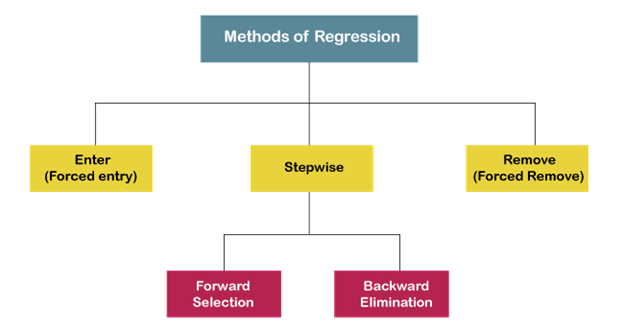

## Forward stepwise 

1. **Begins with a model that contains no variables (called the <span style="color:Purple"> Null Model </span>)**
2.  **Then starts adding the <span style="color:Purple"> most significant variables </span> one after the other**
  - **It has the smallest p-value, or**
  - **It provides the highest increase in R2, or**
  - **It provides the highest drop in model RSS (Residuals Sum of Squares)**
3. **Until a <span style="color:Purple"> pre-specified stopping rule </span> is reached or until all the variables under consideration are included in the model**
 - **The stopping rule is satisfied when all remaining variables to consider have a p-value larger than      some <br> specified threshold, if added to the model**

In [ ]:
#!pip install mlxtend
#or
#!pip install scikit-learn mlxtend

In [ ]:
# Create a scikit-learn compatible model (LinearRegression)
model3 = LinearRegression()
sfs1 = sfs(model3, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')#"r2"

In [ ]:
sfs1 = sfs1.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

In [ ]:
sfs2 = sfs(model3, k_features = 4, forward = True, verbose = 2, scoring = "r2") 
sfs2 = sfs2.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs2.k_feature_names_)
print(feat_names)

**As a result, using the Forward method, we observe that 4 features have been retained.**

## Backward stepwise 

1. **Begins with a model that contains all variables under consideration (called the <span style="color:Purple"> Full Model </span>)**
2. **Then starts removing the <span style="color:Purple">  least significant variables </span> one after the other**
  - **Has the highest p-value in the model, or**
  - **Its elimination from the model causes the lowest drop in R2, or**
  - **Its elimination from the model causes the lowest increase in RSS (Residuals Sum of Squares)** 
3. **Until a <span style="color:Purple">  pre-specified stopping rule </span> is reached or until no variable is left in the model**
  - **The stopping rule is satisfied when all remaining variables in the model have a p-value smaller <br> than some pre-specified threshold.**

In [ ]:
sfs3 = sfs(model3, k_features=4, forward= False , verbose=2, scoring='neg_mean_squared_error') #"r2"
sfs3 = sfs3.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs3.k_feature_names_)
print(feat_names)

In [ ]:
sfs4 = sfs(model3, k_features=4, forward= False , verbose=2, scoring='r2') #"r2"
sfs4 = sfs4.fit(X_train, y_train)

In [ ]:
feat_names = list(sfs4.k_feature_names_)
print(feat_names)

**As a result, using the Backward method, we observe that 4 features have been retained same as Forward stepwise .**

## Non-linearity of the response-predictor relationship

**The linear regression model assumes that there is a straight-line relationship between the predictors and the response. If the true relationship is
far from linear, then virtually all of the conclusions that we draw from the
fit are suspect. In addition, the prediction accuracy of the model can be
significantly reduced.**

$$ medv_i = \beta_0 + \beta_1 lstat_i + \beta_2 ptratio_i + \beta_3 rm_i +\beta_4 black_i +\epsilon_i$$

**to further explore the potential nonlinear relationships among the predictor variables that have been retained in the model from the previous step, we will conduct linear regression between these selected predictors and the response variable 'medv'.**

In [ ]:
Data_step4 = Boston_scaling.loc[:, ['medv', 'rm', 'dis','ptratio','lstat']]
data_train, data_test = train_test_split(Data_step4, test_size=0.20, random_state = 42)

In [ ]:
X_train = data_train.loc[:, data_train.columns != "medv"]
y_train = data_train["medv"]

In [ ]:
X_test = data_test.loc[:, data_test.columns != "medv"]
y_test = data_test["medv"]

In [ ]:
model4_1 = LinearRegression()
model4_1.fit(X_train,y_train)

In [ ]:
r_sq = model4_1.score(X_train , y_train)
print(f"coefficient of determination: {r_sq}")

In [ ]:
error = y_train - model4_1.predict(X_train)
plt.figure(figsize=(5, 4))
plt.scatter(model4_1.predict(X_train), error , color = 'blue')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('fitted value')
plt.ylabel('error')

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly.fit_transform(X_train)

In [ ]:
model4_2 = LinearRegression().fit(X_poly, y_train)
model4_2

In [ ]:
r_sq = model4_2.score(X_poly , y_train)
print(f"coefficient of determination: {r_sq}")

In [ ]:
error = y_train - model4_2.predict(X_poly)
plt.figure(figsize=(5, 4))
plt.scatter(model4_2.predict(X_poly), error , color = 'blue')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel('fitted value')
plt.ylabel('error')

## Correlation of Error Terms

- **An important assumption of the linear regression model is that the error terms, $\epsilon_1$, $\epsilon_2$, . . . , $\epsilon_n$, are <span style="color:Purple"> uncorrelated  </span>. What does this mean? For instance, if the errors are  uncorrelated, then the fact that $\epsilon_i$ is positive provides little or no information about the sign of $\epsilon_{i+1}$. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of uncorrelated error terms.**
- **If in fact there is correlation among the error terms, then the <span style="color:Purple">  estimated standard errors will tend to underestimate the true standard errors </span>. As a result, confidence and prediction intervals will be narrower than they should be. For example, a 95 % confidence interval may in reality have a much lower probability than 0.95 of containing the true value of the parameter. In addition, p-values associated with the model will be lower than they should be; this could cause us to erroneously conclude that a parameter is statistically significant. In short, if the error terms are correlated, we may have an unwarranted sense of confidence in our model.**
- **Why might correlations among the error terms occur? Such correlations frequently occur in the context of <span style="color:Purple"> time series data </span>.**

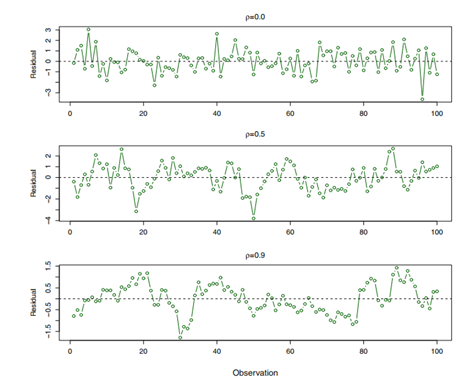

**Another important assumption of a linear regression model is that error terms should not exhibit autocorrelation. If this assumption is violated, the p-values associated with the model might be lower than expected, leading to unreliable confidence intervals. Autocorrelation in errors, especially in time series data, can pose challenges. To investigate whether this holds true for a specific dataset, residual plots can be generated against time. If errors don't show any distinct pattern, it implies that they are not correlated. Autocorrelation among error terms can also extend beyond time series data. For example, consider a study predicting height based on weight. If some participants in the study are family members, follow similar diets, or experience the same environmental factors, the assumption of uncorrelated errors might be violated.**

**A self-autocorrelation test designed for regression models is the Durbin-Watson test. It's employed to assess whether there is first-order autocorrelation (no lag one autocorrelation) in residuals. This essentially means that there shouldn't be any autocorrelation. A low p-value indicates that significant autocorrelation remains in the residuals.**

**As a general guideline:**

- **In the absence of autocorrelation, the Durbin-Watson distribution is roughly symmetric around 2.**
- **If the Durbin-Watson statistic is less than 1.0, it might raise concerns and warrant closer examination.**
- **Low values of 'd' suggest positive serial correlation in error terms.**
- **If d > 2, it indicates negative serial correlation in error terms.**

In [ ]:
sm.stats.durbin_watson(error)

In [ ]:
# autocorrelation
sm.graphics.tsa.plot_acf(error, lags=40)
plt.show()

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(error, lags=40)
plt.show()

**The findings reveal evidence of autocorrelation as evident from the spikes outside the blue confidence interval range. This could be due to the seasonal nature of the data.**

## Non-constant Variance of Error Terms or Heteroskedasticity

- **Another important assumption of the linear regression model is that the error terms have a constant variance, Var( $\epsilon_i$) =  $\sigma^2$.** 
- **Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase with the value of the response. One can identify non-constant variances in the errors, or  <span style="color:Purple"> heteroscedasticity  </span> , from the presence of a <span style="color:Purple"> funnel shape  </span> in residual plot.**
- **When faced with this problem, one possible solution is to transform the response Y using a concave function such as  $log Y$ or $\sqrt{Y}$ .**

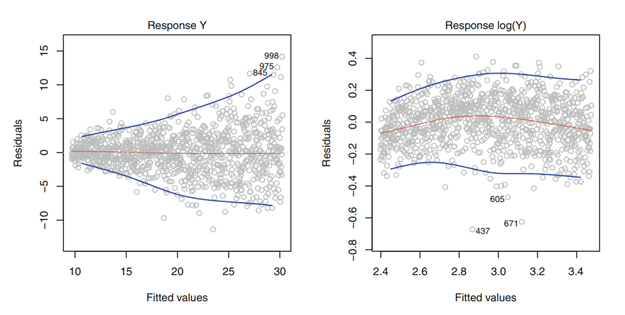

### Goldfeld Quandt Test

**The result you obtained from the code indicates the output of a statistical test called the Goldfeld-Quandt test. This test is used to assess whether the variance of the errors in a regression model is constant across different segments of the data.**

**The `Goldfeld-Quandt` test calculates an F statistic and its associated p-value. The F statistic measures the ratio of the variances of the errors between two segments of the data, often split at a certain point. The p-value helps you determine whether the obtained F statistic is statistically significant or if it could have occurred due to random chance.**

- **The F statistic provides a measure of how much the variances of errors differ between the two segments.**
- **The p-value is used to determine whether the difference in variances is statistically significant. A small p-value (typically below a significance level like 0.05) suggests that the variances are significantly different, while a larger p-value suggests that the variances are similar.**

**Using the Goldfeld-Quandt test, we examine heteroscedasticity:**

- **Null Hypothesis: Error terms are homoscedastic.**

- **Alternative Hypothesis: Error terms are heteroscedastic.**

In [ ]:
name = ['F statistic', 'p-value']
test = sm.stats.het_goldfeldquandt(error, X_poly)
lzip(name, test)

**Since the p-value in the Goldfeld Quandt test is greater than 0.05, we cannot reject the null hypothesis. Therefore, we can conclude that the error terms are homoscedastic, which is a desirable result.**

### Check for Normality of error terms

In [ ]:
p = sn.displot(error,kde=True)
p = plt.title('Normality of error terms/residuals')

**The remaining values, derived from the test points we've collected, exhibit a distribution that is quite close to a normal distribution. This alignment with the Central Limit Theorem, stating that distributions tend to become more normal as sample size increases, is evident. Additionally, there is some noticeable skewness and kurtosis present in the plot.**

## Collinearity

- **Collinearity refers to the situation in which two or more predictor variables collinearity are <span style="color:Purple"> closely related </span> to one another.**
- **The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the <span style="color:Purple"> individual effects of collinear variables </span> individual effects of collinear variables on the response.**
- **collinearity reduces the accuracy of the estimates of the regression coefficients**
- **A simple way to detect collinearity is to look at the correlation matrix of the predictors.**

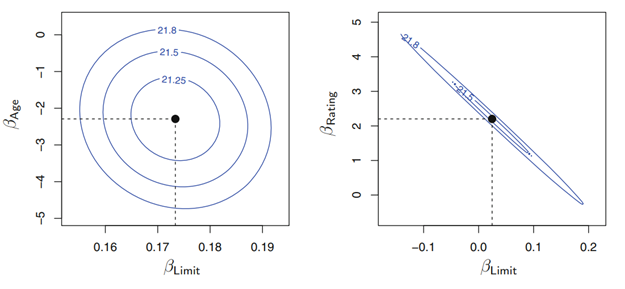

In [ ]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = Boston_scaling.drop(columns=['crim', 'zn', 'indus', 'nox' , 'age',  'black' , 'rad' , 'tax' , 'lstat']).corr()
# corr = Boston_scaling[['rm', 'dis', 'ptratio', 'lstat']].corr()

# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap as indicator for correlations:
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Plot
sn.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

In [ ]:
fig = plt.figure(figsize=(8,5))
sn.heatmap(corr, annot=True)
plt.show()

**The general principle is that when two predictor variables exhibit a Pearson correlation exceeding 0.8, it indicates a strong association between them. In such cases, the variables are interdependent and demonstrate a substantial linear relationship with each other.**

### Variance inflation factor (VIF)

**Multicollinearity occurs when there's a strong correlation between two or more predictor variables within a multiple regression model. When certain features are highly correlated, it becomes challenging to isolate their individual effects on the response variable.**

**Detecting multicollinearity involves various techniques, and one of these methods is the Variance `Inflation Factor (VIF)`. The VIF measures the impact of interdependency among predictor variables on the accuracy of our coefficient estimates. With the VIF approach, we assess each feature by regressing it against all other features, helping us gauge the extent to which variance in a coefficient is inflated due to this interdependency.**

 - **The VIF for each variable can be computed using the formula**

$$VIF(\hat{\beta}) = \frac{1}{1-R^2_{x_j|x_{-j}}} $$

**where $R^2_{x_j|x_{-j}}$ is the $R^2$ from a regression of $x_j$ onto all of the other
predictors. If $R^2_{x_j|x_{-j}}$ is close to one, then collinearity <br> is present, and so
the VIF will be large.**

- **A higher R-squared value leads to a higher VIF, indicating stronger multicollinearity.**
- **High VIF suggests significant correlation between predictor variables.**
- **VIF below 1 implies Low correlation.**
- **VIF between 1 and 5  generally implies moderate correlation.**
- **VIF above 5 implies High correlation.**
- **VIF exceeding 10 signifies noteworthy multicollinearity that requires attention.**

In [ ]:
# Select the predictor variables (features) for which you want to calculate VIF
X = Boston_scaling[['rm', 'dis', 'ptratio', 'lstat']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

**If you found this notebook helpful, please don't forget to <span style='color:#F7A100'>Upvote</span> and <span style='color:#F7A100'>Follow</span> me. Thank you.**